In [9]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
token_df = pd.read_csv('token_dataframe.csv')

token_df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_price,dextools_price5m,...,dextools_variation6h,dextools_price24h,dextools_variation24h,dextools_circulatingSupply,dextools_totalSupply,dextools_mcap,dextools_fdv,dextools_holders,transaction_value_usd,market_cap_millions
0,2024-11-28 15:08:48,0x582629f26b088a43c651dc9a88aae9f5befb119dc6c6...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x80c62fe4487e1351b47ba49809ebd60ed085bf52,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,Clover,CLV,3800000000000000000000000,0.126218,0.000000,...,0.000000,0.106352,18.679720,1.200000e+08,1.000000e+09,1.514620e+07,1.262183e+08,17671.0,4.796297e+23,15.146200
1,2024-11-28 15:10:56,0x5ec2790bc316cad7c2c92c8058e199612553190c248e...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xe53ec727dbdeb9e2d5456c3be40cff031ab40a55,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,SuperVerse,SUPER,240000000000000000000000,1.745558,0.000000,...,-2.409743,1.624130,7.476461,4.879761e+08,9.999981e+08,8.517904e+08,1.745554e+09,40459.0,4.189338e+23,851.790371
2,2024-11-28 15:38:40,0x192a53111cc2655fb30b9f87baa42338ae75db7c3264...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0xa62cc35625b0c8dc1faea39d33625bb4c15bd71c,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StormX,STMX,8000000000000000000000000,0.008827,0.007707,...,-0.379260,0.007881,12.007352,1.231841e+10,1.250000e+10,1.059101e+08,1.074714e+08,0.0,7.061453e+22,105.910065
3,2024-11-28 18:29:20,0x2f32f10d6bb53e0485e9f546b64ad7708126c83be29a...,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,0xbe0ed4138121ecfc5c0e56b40517da27e6c5226b,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,Aethir Token,ATH,14638473810000000000000000,0.079256,0.079256,...,5.918223,0.072449,9.395056,5.217818e+09,4.200000e+10,4.135440e+08,3.328757e+09,45172.0,1.160189e+24,413.544035
4,2024-11-28 21:09:20,0x171d72aa0a454232b860c1242b6f003fc4ebddf74dc7...,0xedc6bacdc1e29d7c5fa6f6eca6fdd447b9c487c9,0x744d70fdbe2ba4cf95131626614a1763df805b9e,0xab782bc7d4a2b306825de5a7730034f8f63ee1bc,StatusNetwork,SNT,800000000000000000000000,0.069089,0.000000,...,-2.897060,0.068820,0.390742,3.996915e+09,6.804870e+09,2.761417e+08,4.701398e+08,82670.0,5.527098e+22,276.141727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2024-12-05 00:12:48,0x1bf8fa53098286c2525ea118b33351e4b9b6eda0a17f...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,36500000000000000000,0.009167,0.000000,...,0.007888,0.006939,32.122045,0.000000e+00,1.000000e+09,0.000000e+00,9.167329e+06,67.0,3.346075e+17,0.000000
766,2024-12-05 00:14:56,0x99bf841e2952fc17ee422384de73a72f6a1b32d67d8b...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,86500000000000000000,0.021055,0.000000,...,0.000000,0.017600,19.629760,0.000000e+00,1.000000e+09,0.000000e+00,2.105473e+07,73.0,1.821234e+18,0.000000
767,2024-12-05 01:18:56,0x78699b434693d6d9ebec564cadb03687194743460ee8...,0x029e87052e18a259367557e1ff32880951cc7d29,0xdba22db98d9651e7d11b811476b0c7c563d7ff84,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Tesla AI,TESLA AI,53500000000000000000,0.021055,0.000000,...,0.000000,0.017600,19.629760,0.000000e+00,1.000000e+09,0.000000e+00,2.105473e+07,73.0,1.126428e+18,0.000000
768,2024-12-05 07:30:08,0xa804cf63e51915948e2471c0742cd67aa60819cede2a...,0xc49d4b479ef7235e62359d1a6fe48c3f65954568,0xc7e8c1ff4afdfc47ff9885627afe9a3fa2d7c65b,0x8b1396f754b83afa1d06d273d5915d573b4f04ee,Nvidia AI,NVIDIA AI,66866550000000000000,0.009167,0.000000,...,0.007888,0.006939,32.122045,0.000000e+00,1.000000e+09,0.000000e+00,9.167329e+06,67.0,6.129877e+17,0.000000


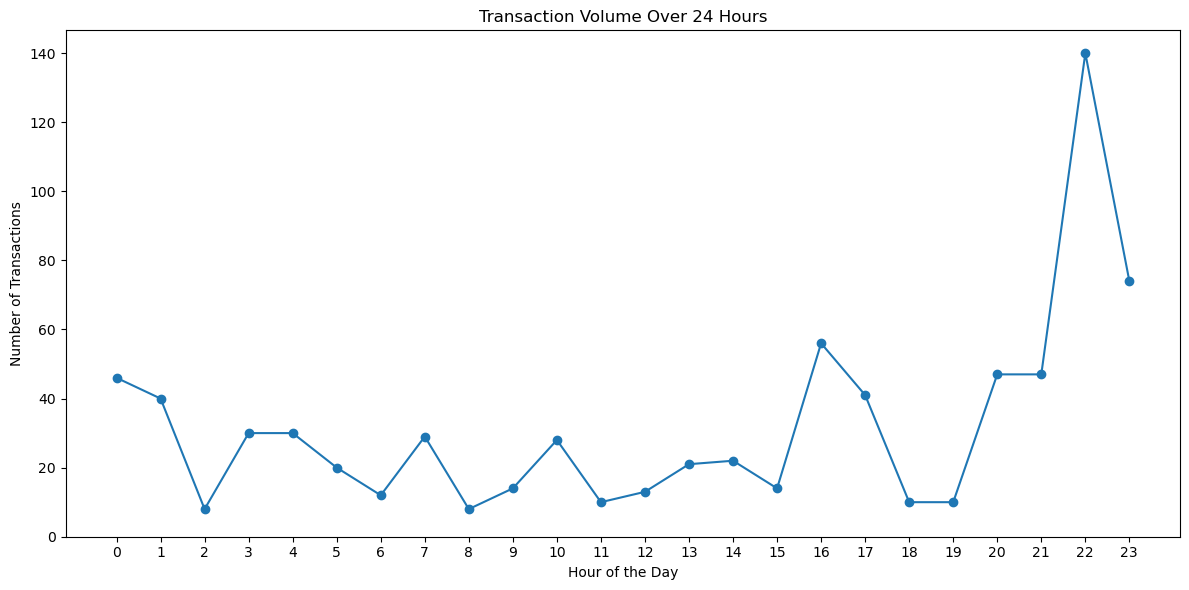

In [11]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Visualizing transaction volume over time if timeStamp exists
if "timeStamp" in token_df.columns:
    token_df['timeStamp'] = pd.to_datetime(token_df['timeStamp'])
    token_df['hour'] = token_df['timeStamp'].dt.hour
    transaction_volume = token_df.groupby('hour').size()
    
    # Create a new series with zeros and update with transaction volumes
    hours = range(24)
    volume_with_zeros = pd.Series(0, index=hours)
    volume_with_zeros.update(transaction_volume)
    
    plt.plot(volume_with_zeros.index, volume_with_zeros.values, marker='o')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Transactions')
    plt.title('Transaction Volume Over 24 Hours')
    plt.xticks(range(0, 24))
    plt.ylim(bottom=0)  # Set the baseline of the y-axis to 0
    plt.tight_layout()
    plt.show()


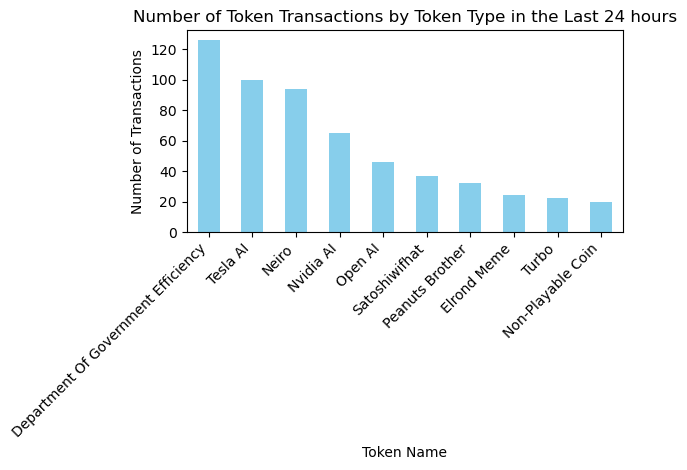

In [12]:
# Visualizing the number of token transactions by token type
token_counts = token_df["tokenName"].value_counts().nlargest(10)
token_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Token Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Token Transactions by Token Type in the Last 24 hours')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment for readability
plt.tight_layout()
plt.show()
